In [1]:
from ioos_model_comparisons.models import rtofs, RTOFS
import cool_maps.plot as cplt

In [2]:
extent = [-90, -82, 17, 24] # yucatan

In [3]:
r = RTOFS()
r

In [4]:
r.data

<xarray.Dataset>
Dimensions:      (depth: 40, y: 1710, x: 742, time: 6191)
Coordinates:
  * depth        (depth) float32 0.0 2.0 4.0 6.0 ... 2.5e+03 3e+03 4e+03 5e+03
  * y            (y) int32 1 2 3 4 5 6 7 ... 1704 1705 1706 1707 1708 1709 1710
  * x            (x) int32 1 2 3 4 5 6 7 8 9 ... 735 736 737 738 739 740 741 742
  * time         (time) datetime64[ns] 2019-07-17T06:00:00 ... 2023-10-28
    lat          (y, x) float32 0.0 0.0 0.0 0.0 0.0 ... 79.65 79.68 79.72 79.75
    lon          (y, x) float32 -100.0 -99.92 -99.84 ... -91.87 -91.82 -91.77
    u            (time, depth, y, x) float32 ...
    v            (time, depth, y, x) float32 ...
Data variables:
    date         (time) float64 ...
    temperature  (time, depth, y, x) float32 ...
    salinity     (time, depth, y, x) float32 ...
Attributes:
    Conventions:  CF-1.0
    title:        HYCOM ATLb2.00
    institution:  National Centers for Environmental Prediction
    source:       ftp://ftp.ncei.noaa.gov/pub/data/nccf/com/rtofs/prod/
    experiment:   92.8
    history:      archv2ncdf3z
    region:       Atlantic/US East Coast
    comment:      This dataset contains the first 4 full volume forecasts (f0...
    model:        RTOFS

In [5]:
r.subset(extent)
r.data

<xarray.Dataset>
Dimensions:      (depth: 40, y: 95, x: 100, time: 6191)
Coordinates:
  * depth        (depth) float32 0.0 2.0 4.0 6.0 ... 2.5e+03 3e+03 4e+03 5e+03
  * y            (y) int32 217 218 219 220 221 222 ... 306 307 308 309 310 311
  * x            (x) int32 127 128 129 130 131 132 ... 221 222 223 224 225 226
  * time         (time) datetime64[ns] 2019-07-17T06:00:00 ... 2023-10-28
    lat          (y, x) float32 ...
    lon          (y, x) float32 ...
    u            (time, depth, y, x) float32 ...
    v            (time, depth, y, x) float32 ...
Data variables:
    date         (time) float64 ...
    temperature  (time, depth, y, x) float32 ...
    salinity     (time, depth, y, x) float32 ...
Attributes:
    Conventions:  CF-1.0
    title:        HYCOM ATLb2.00
    institution:  National Centers for Environmental Prediction
    source:       ftp://ftp.ncei.noaa.gov/pub/data/nccf/com/rtofs/prod/
    experiment:   92.8
    history:      archv2ncdf3z
    region:       Atlantic/US East Coast
    comment:      This dataset contains the first 4 full volume forecasts (f0...
    model:        RTOFS

In [6]:
ds = r.data.isel(time=-1).sel(depth=slice(0,1000))
ds

<xarray.Dataset>
Dimensions:      (depth: 33, y: 95, x: 100)
Coordinates:
  * depth        (depth) float32 0.0 2.0 4.0 6.0 8.0 ... 700.0 800.0 900.0 1e+03
  * y            (y) int32 217 218 219 220 221 222 ... 306 307 308 309 310 311
  * x            (x) int32 127 128 129 130 131 132 ... 221 222 223 224 225 226
    time         datetime64[ns] 2023-10-28
    lat          (y, x) float32 ...
    lon          (y, x) float32 ...
    u            (depth, y, x) float32 ...
    v            (depth, y, x) float32 ...
Data variables:
    date         float64 ...
    temperature  (depth, y, x) float32 ...
    salinity     (depth, y, x) float32 ...
Attributes:
    Conventions:  CF-1.0
    title:        HYCOM ATLb2.00
    institution:  National Centers for Environmental Prediction
    source:       ftp://ftp.ncei.noaa.gov/pub/data/nccf/com/rtofs/prod/
    experiment:   92.8
    history:      archv2ncdf3z
    region:       Atlantic/US East Coast
    comment:      This dataset contains the first 4 full volume forecasts (f0...
    model:        RTOFS

In [7]:
ds['depth'].shape, ds['u'].shape

((33,), (33, 95, 100))

In [8]:
ds

<xarray.Dataset>
Dimensions:      (depth: 33, y: 95, x: 100)
Coordinates:
  * depth        (depth) float32 0.0 2.0 4.0 6.0 8.0 ... 700.0 800.0 900.0 1e+03
  * y            (y) int32 217 218 219 220 221 222 ... 306 307 308 309 310 311
  * x            (x) int32 127 128 129 130 131 132 ... 221 222 223 224 225 226
    time         datetime64[ns] 2023-10-28
    lat          (y, x) float32 ...
    lon          (y, x) float32 ...
    u            (depth, y, x) float32 ...
    v            (depth, y, x) float32 ...
Data variables:
    date         float64 ...
    temperature  (depth, y, x) float32 ...
    salinity     (depth, y, x) float32 ...
Attributes:
    Conventions:  CF-1.0
    title:        HYCOM ATLb2.00
    institution:  National Centers for Environmental Prediction
    source:       ftp://ftp.ncei.noaa.gov/pub/data/nccf/com/rtofs/prod/
    experiment:   92.8
    history:      archv2ncdf3z
    region:       Atlantic/US East Coast
    comment:      This dataset contains the first 4 full volume forecasts (f0...
    model:        RTOFS

In [10]:
from ioos_model_comparisons.calc import depth_averaged_current_vectorized
import xarray as xr

# tds['pressure'] = xr.apply_ufunc(seawater.eos80.pres, tds.depth, tds.lat)

# depth_avg_u, depth_avg_v= xr.apply_ufunc(depth_averaged_current, ds['depth'], ds['u'], ds['v'])
# Assuming ds is your loaded xarray.Dataset
u_avg, v_avg = xr.apply_ufunc(
    depth_averaged_current_vectorized, 
    ds.depth, ds.u, ds.v, 
    input_core_dims=[['depth'], ['depth'], ['depth']],
    output_core_dims=[[], []], # u_avg and v_avg don't have core dimensions
    vectorize=True, 
    dask="parallelized",
    output_dtypes=[float, float]
)

ValueError: setting an array element with a sequence.

In [11]:
import numpy as np

def depth_averaged_current_manual(ds):
    u_currents = ds['u']
    v_currents = ds['v']
    depths = ds['depth']

    layer_thicknesses = np.diff(depths)
    layer_thicknesses = np.insert(layer_thicknesses, 0, layer_thicknesses[0]) # Add the first thickness to the start

    depth_weighted_u_currents = u_currents * layer_thicknesses[:, np.newaxis, np.newaxis]
    depth_weighted_v_currents = v_currents * layer_thicknesses[:, np.newaxis, np.newaxis]

    u_avg = depth_weighted_u_currents.sum(dim='depth') / np.sum(layer_thicknesses)
    v_avg = depth_weighted_v_currents.sum(dim='depth') / np.sum(layer_thicknesses)

    return u_avg, v_avg

In [12]:
u_avg, v_avg = depth_averaged_current_manual(ds)
# ds['u_avg'] = (('y', 'x'), u_avg)
# ds['v_avg'] = (('y', 'x'), v_avg)

# print(ds['u_avg'])
# print(ds['v_avg'])

In [15]:
u_avg

<xarray.DataArray 'u' (y: 95, x: 100)>
array([[ 0.        ,  0.        ,  0.        , ...,  0.00289051,
        -0.00455165, -0.01147291],
       [ 0.        ,  0.        ,  0.        , ...,  0.00517852,
        -0.00235092, -0.01086976],
       [ 0.        ,  0.        ,  0.        , ..., -0.00558636,
        -0.01122146, -0.01833058],
       ...,
       [-0.03699482, -0.04349607, -0.04698094, ...,  0.06529368,
         0.11551695,  0.15589511],
       [-0.0484438 , -0.05345528, -0.05662186, ..., -0.02930302,
         0.01464712,  0.05505574],
       [-0.06515955, -0.07312743, -0.07674319, ..., -0.0443033 ,
         0.0008803 ,  0.04635635]], dtype=float32)
Coordinates:
  * y        (y) int32 217 218 219 220 221 222 223 ... 306 307 308 309 310 311
  * x        (x) int32 127 128 129 130 131 132 133 ... 221 222 223 224 225 226
    time     datetime64[ns] 2023-10-28
    lat      (y, x) float32 ...
    lon      (y, x) float32 ...

In [16]:
ds['u_avg'] = (('y', 'x'), u_avg.data)
ds['v_avg'] = (('y', 'x'), v_avg.data)

print(ds['u_avg'])
print(ds['v_avg'])

<xarray.DataArray 'u_avg' (y: 95, x: 100)>
array([[ 0.        ,  0.        ,  0.        , ...,  0.00289051,
        -0.00455165, -0.01147291],
       [ 0.        ,  0.        ,  0.        , ...,  0.00517852,
        -0.00235092, -0.01086976],
       [ 0.        ,  0.        ,  0.        , ..., -0.00558636,
        -0.01122146, -0.01833058],
       ...,
       [-0.03699482, -0.04349607, -0.04698094, ...,  0.06529368,
         0.11551695,  0.15589511],
       [-0.0484438 , -0.05345528, -0.05662186, ..., -0.02930302,
         0.01464712,  0.05505574],
       [-0.06515955, -0.07312743, -0.07674319, ..., -0.0443033 ,
         0.0008803 ,  0.04635635]], dtype=float32)
Coordinates:
  * y        (y) int32 217 218 219 220 221 222 223 ... 306 307 308 309 310 311
  * x        (x) int32 127 128 129 130 131 132 133 ... 221 222 223 224 225 226
    time     datetime64[ns] 2023-10-28
    lat      (y, x) float32 ...
    lon      (y, x) float32 ...
<xarray.DataArray 'v_avg' (y: 95, x: 100)>
array([[ 0. 

In [21]:
ds.u_avg.shape

(95, 100)

Text(0.5, 1.0, 'Depth-Average Currents (RTOFS) - 2023-10-28T00:00:00Z')

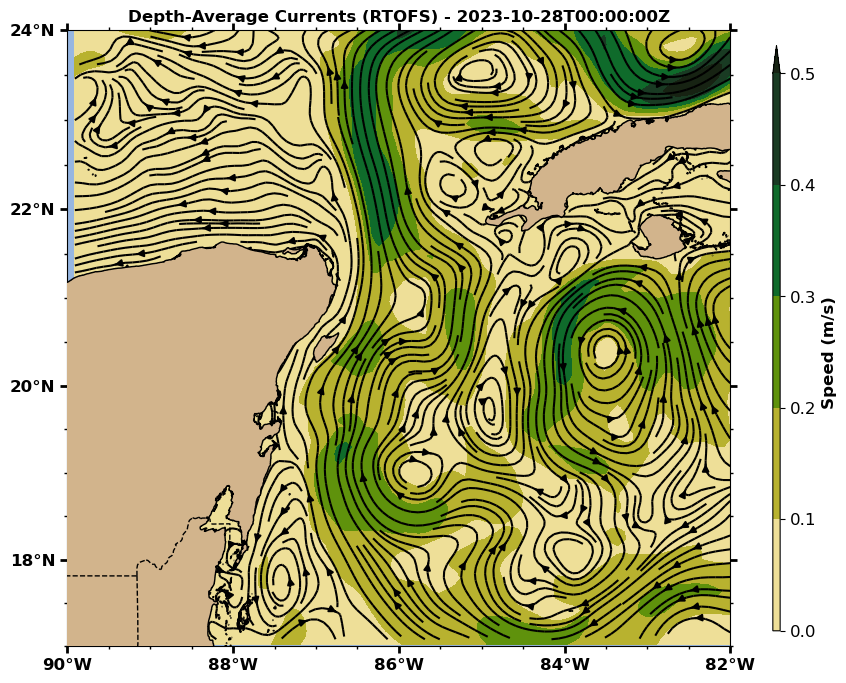

In [28]:
import cartopy.crs as ccrs
import cmocean
from oceans.ocfis import uv2spdir

_, speed = uv2spdir(ds.u_avg, ds.v_avg)

fig, ax = cplt.create(extent)
ax.streamplot(ds.lon.data, ds.lat.data, ds.u_avg.data, ds.v_avg.data, density=3, color='black', transform=ccrs.PlateCarree())

h2 = ax.contourf(
    ds.lon.data,
    ds.lat.data,
    speed,
    transform=ccrs.PlateCarree(),
    levels=np.arange(0, 0.6, .1),
    cmap=cmocean.cm.speed,
    extend='max'
)


cb = fig.colorbar(h2, ax=ax, orientation="vertical", shrink=.95, aspect=80)#, shrink=0.7, aspect=20*0.7)
cb.ax.tick_params(labelsize=12)
cb.set_label(f'Speed (m/s)', fontsize=12, fontweight="bold")
ax.set_title(f'Depth-Average Currents (RTOFS) - 2023-10-28T00:00:00Z', fontweight='bold')
# plt.suptitle(f'RTOFS Binary (a b file) Comparisons - {ctime.strftime("%Y-%m-%dT%H:%MZ")} - {np.floor(np.abs(z0))}m', fontweight='bold')
# plt.savefig(vname, dpi=300, bbox_inches='tight', pad_inches=0.1)
# plt.close()

In [ ]:
from ioos_model_comparisons.calc import depth_averaged_current

In [29]:
import xarray as xr

ncfile = '/Volumes/hurricaneadm/data/rtofs/rtofs.20231031/rtofs_glo_3dz_f006_6hrly_hvr_US_east.nc'

ds = xr.open_dataset(ncfile)
ds

<xarray.Dataset>
Dimensions:      (MT: 1, Depth: 40, Y: 1710, X: 742)
Coordinates:
  * MT           (MT) datetime64[ns] 2023-10-31T06:00:00
    Date         (MT) float64 ...
  * Depth        (Depth) float32 0.0 2.0 4.0 6.0 ... 2.5e+03 3e+03 4e+03 5e+03
  * Y            (Y) int32 1 2 3 4 5 6 7 ... 1704 1705 1706 1707 1708 1709 1710
  * X            (X) int32 1 2 3 4 5 6 7 8 9 ... 735 736 737 738 739 740 741 742
    Latitude     (Y, X) float32 ...
    Longitude    (Y, X) float32 ...
Data variables:
    u            (MT, Depth, Y, X) float32 ...
    v            (MT, Depth, Y, X) float32 ...
    temperature  (MT, Depth, Y, X) float32 ...
    salinity     (MT, Depth, Y, X) float32 ...
Attributes:
    Conventions:  CF-1.0
    title:        HYCOM ATLb2.00
    institution:  National Centers for Environmental Prediction
    source:       HYCOM archive file
    experiment:   92.8
    history:      archv2ncdf3z

In [35]:
tds = ds.sel(Depth=slice(0, 1000)).squeeze()
tds

<xarray.Dataset>
Dimensions:      (Depth: 33, Y: 1710, X: 742)
Coordinates:
    MT           datetime64[ns] 2023-10-31T06:00:00
    Date         float64 ...
  * Depth        (Depth) float32 0.0 2.0 4.0 6.0 8.0 ... 700.0 800.0 900.0 1e+03
  * Y            (Y) int32 1 2 3 4 5 6 7 ... 1704 1705 1706 1707 1708 1709 1710
  * X            (X) int32 1 2 3 4 5 6 7 8 9 ... 735 736 737 738 739 740 741 742
    Latitude     (Y, X) float32 ...
    Longitude    (Y, X) float32 ...
Data variables:
    u            (Depth, Y, X) float32 ...
    v            (Depth, Y, X) float32 ...
    temperature  (Depth, Y, X) float32 ...
    salinity     (Depth, Y, X) float32 ...
Attributes:
    Conventions:  CF-1.0
    title:        HYCOM ATLb2.00
    institution:  National Centers for Environmental Prediction
    source:       HYCOM archive file
    experiment:   92.8
    history:      archv2ncdf3z

In [43]:
tds_mean = tds[['u','v']].mean('Depth')
tds_mean

<xarray.Dataset>
Dimensions:    (Y: 1710, X: 742)
Coordinates:
    MT         datetime64[ns] 2023-10-31T06:00:00
    Date       float64 ...
  * Y          (Y) int32 1 2 3 4 5 6 7 8 ... 1704 1705 1706 1707 1708 1709 1710
  * X          (X) int32 1 2 3 4 5 6 7 8 9 ... 735 736 737 738 739 740 741 742
    Latitude   (Y, X) float32 0.0 0.0 0.0 0.0 0.0 ... 79.65 79.68 79.72 79.75
    Longitude  (Y, X) float32 -100.0 -99.92 -99.84 ... -91.87 -91.82 -91.77
Data variables:
    u          (Y, X) float32 -0.02369 -0.02453 -0.01916 ... nan nan nan
    v          (Y, X) float32 -0.05556 -0.05333 -0.05702 ... nan nan nan

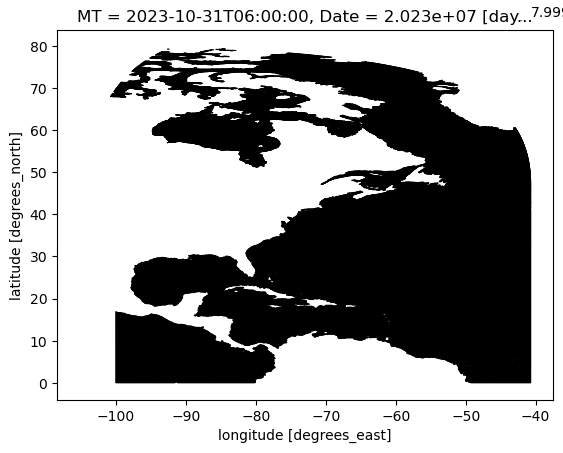

In [44]:
tds_mean.plot.quiver(x='Longitude', y='Latitude', u='u', v='v')